<a href="https://colab.research.google.com/github/uygararas/ie423/blob/main/task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

#**Jupyter Notebook Created by Uygar Aras for IE 423 Task 4 Predictive Analysis and Model Comparison for Bank Term Deposit Subscriptions**

---



In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, f1_score

from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dfBnk = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/bank/bank-full.csv')

In [4]:
# Check for missing values and unique values
missing_values = dfBnk.isnull().sum()
unique_values = dfBnk.nunique()

# Print missing values and unique values
print("Missing Values:\n", missing_values)
print("\nUnique Values:\n", unique_values)

# One-hot encode categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
dfBnk_encoded = pd.get_dummies(dfBnk, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded dataframe
dfBnk_encoded.head()

Missing Values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Unique Values:
 age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,44,29,5,151,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,33,2,5,76,1,-1,0,False,True,False,...,False,False,True,False,False,False,False,False,True,False
3,47,1506,5,92,1,-1,0,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,33,1,5,198,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False


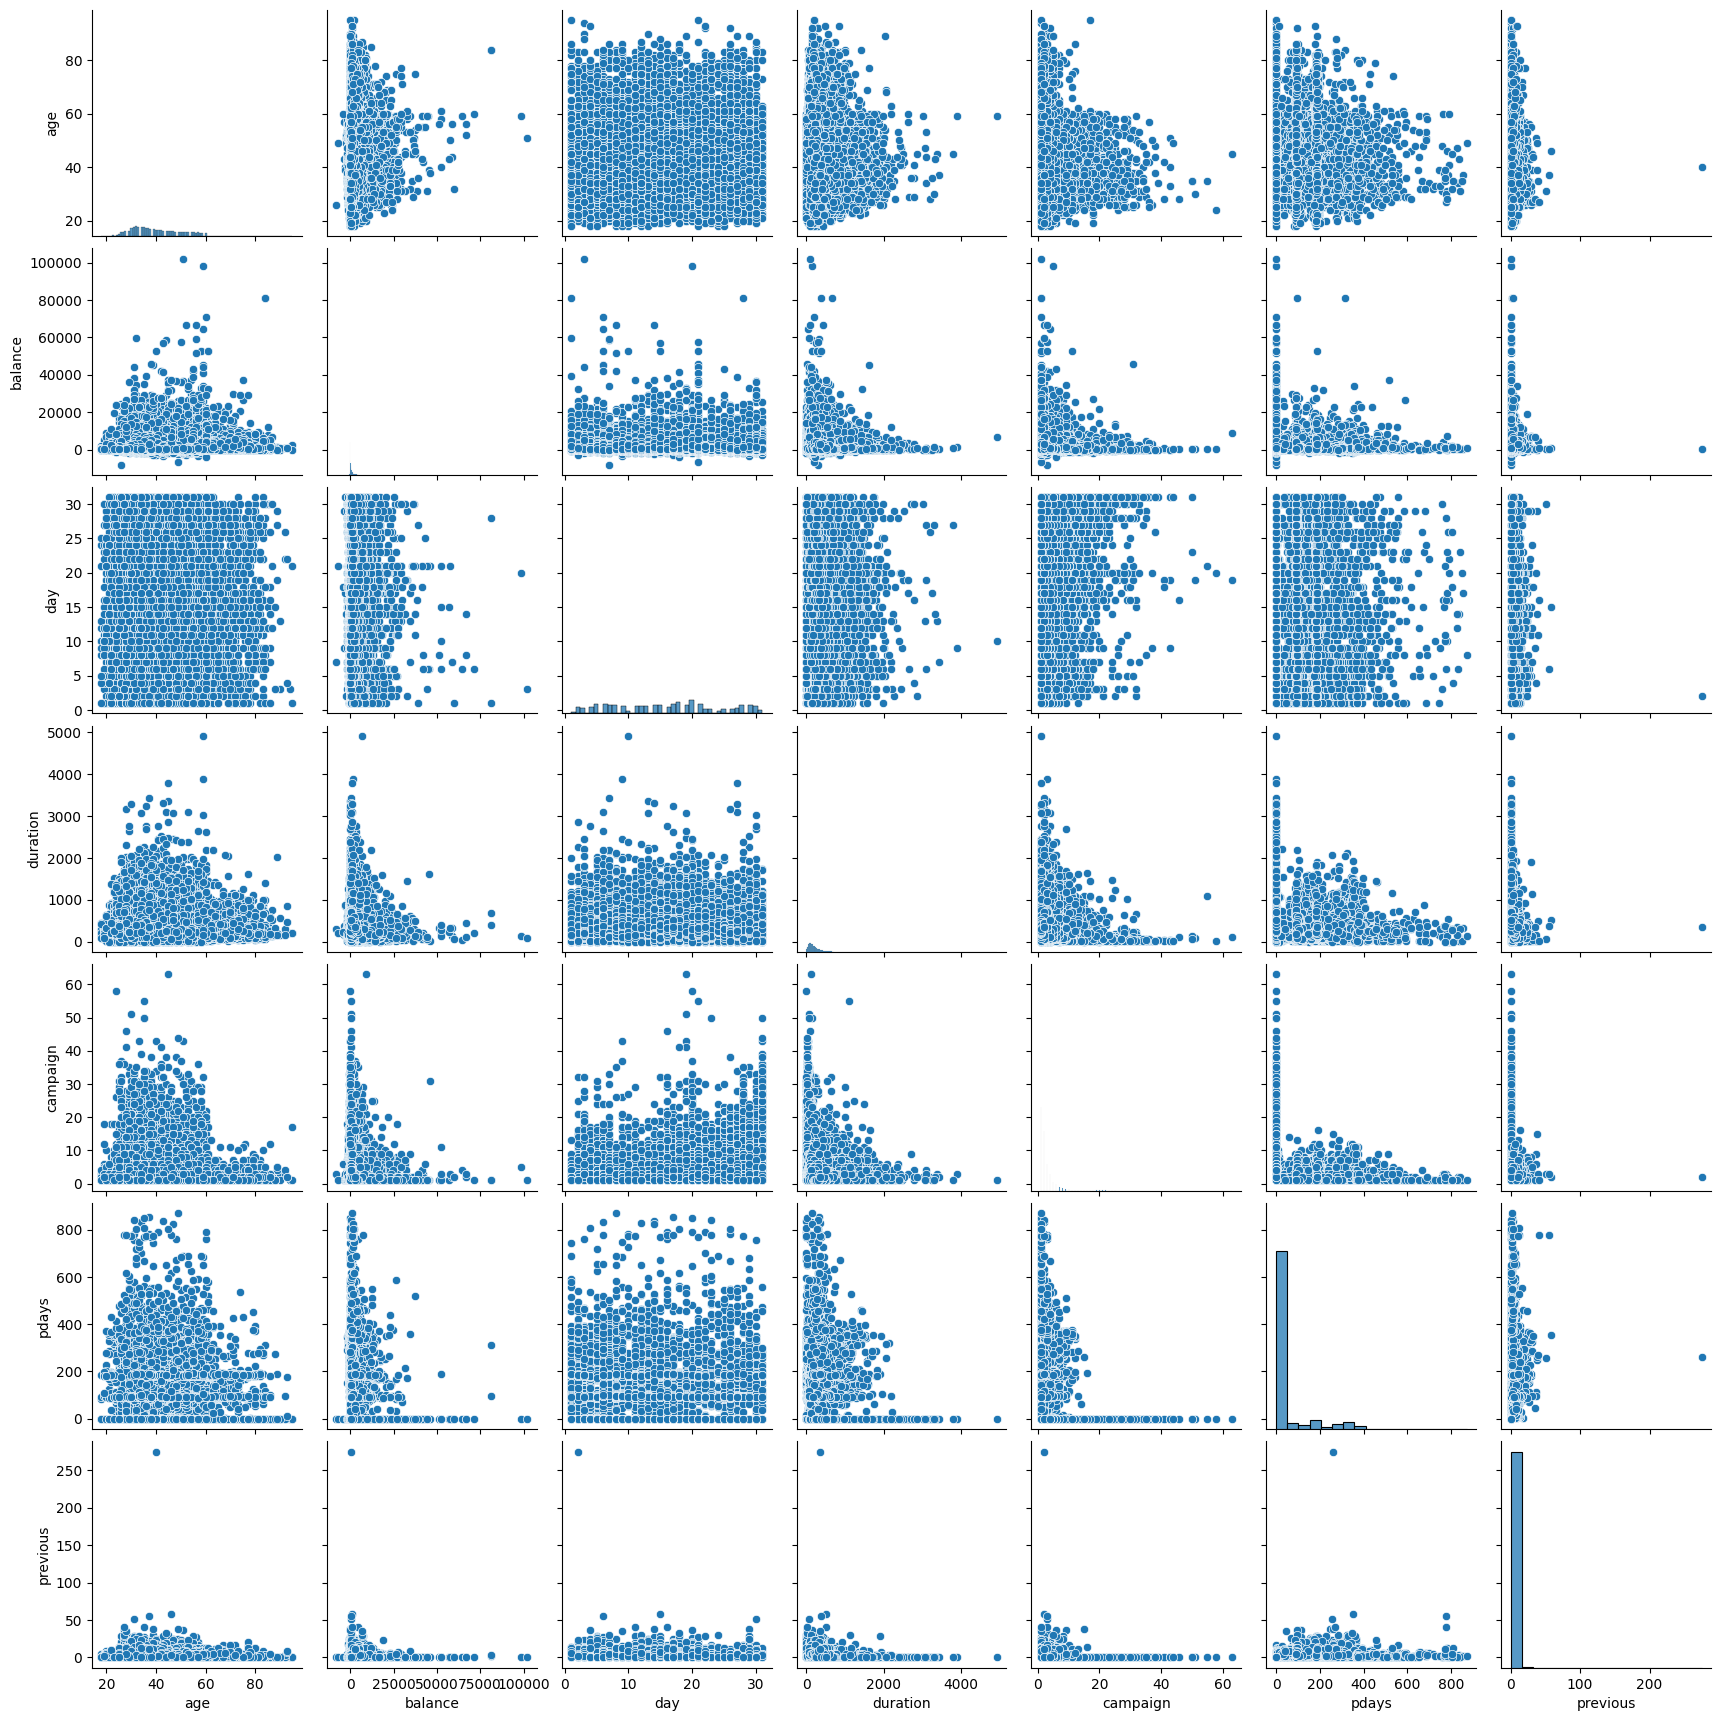

In [6]:
import seaborn as sns
sns.pairplot(dfBnk)

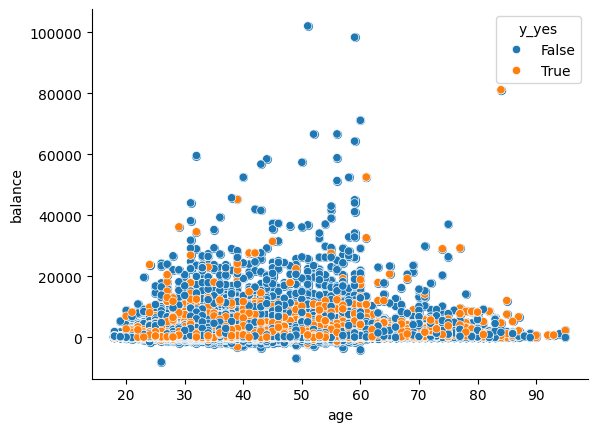

In [8]:
dfBnk_encoded.plot(kind='scatter', x='age', y='balance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# 3D Scatter plot with hue
# Assuming 'y' is a column in dfBnk that you want to use for the hue
sns.scatterplot(x=dfBnk_encoded['age'], y=dfBnk_encoded['balance'], hue=dfBnk_encoded['y_yes'])
plt.show()

# **Exploratory Data Analysis (EDA)**

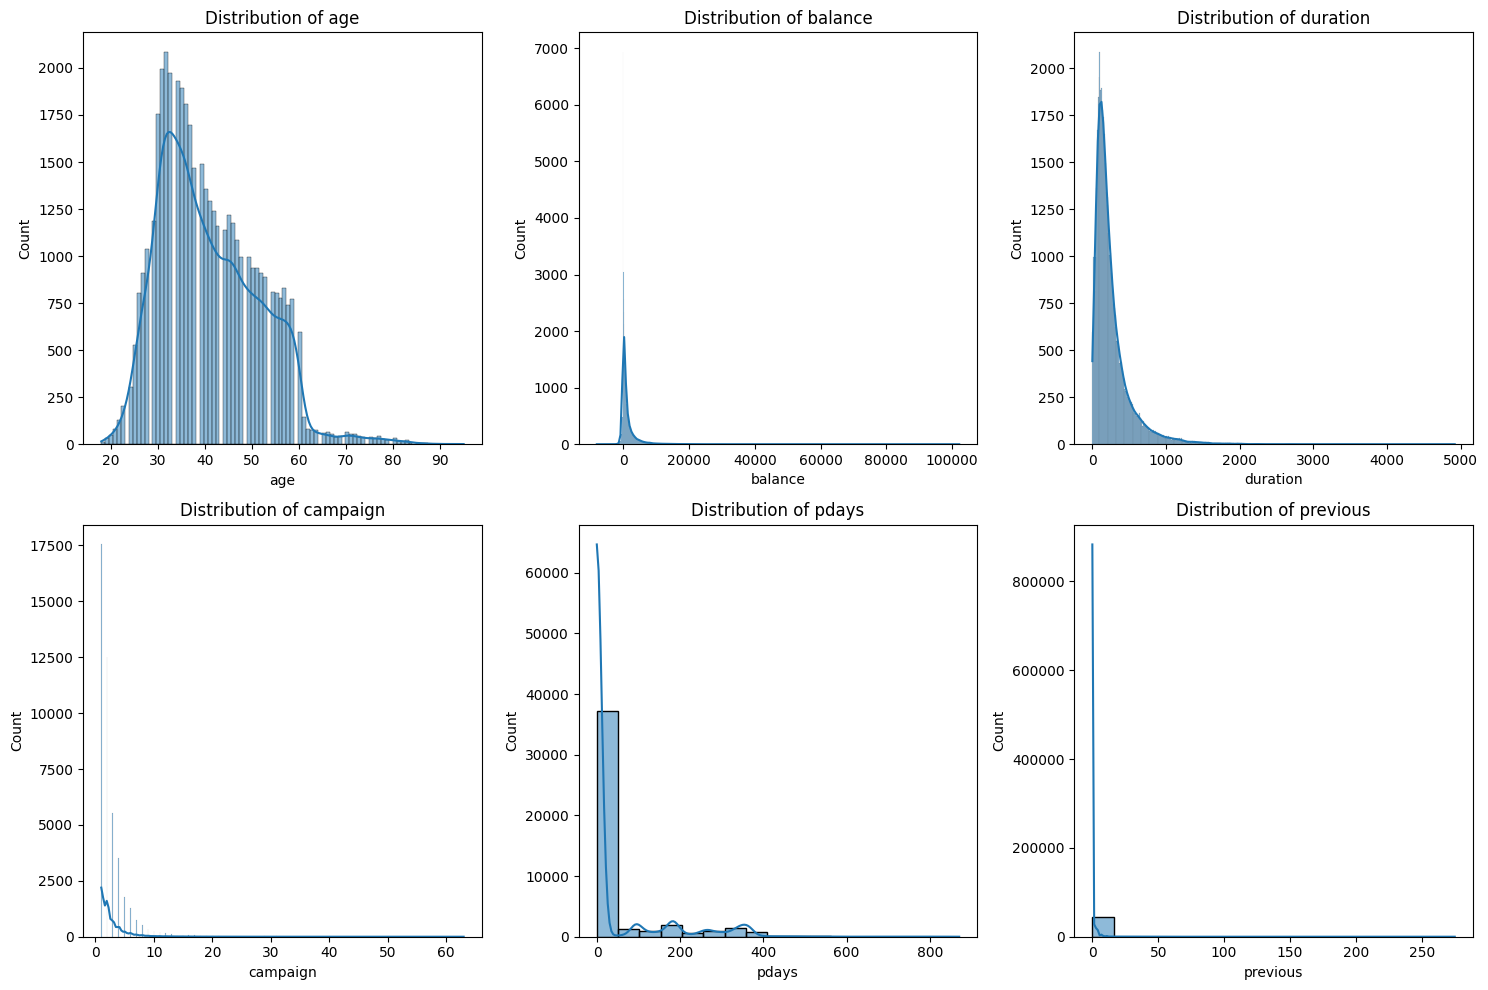

In [9]:
# Visualize the distribution of numerical features
numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(dfBnk_encoded[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

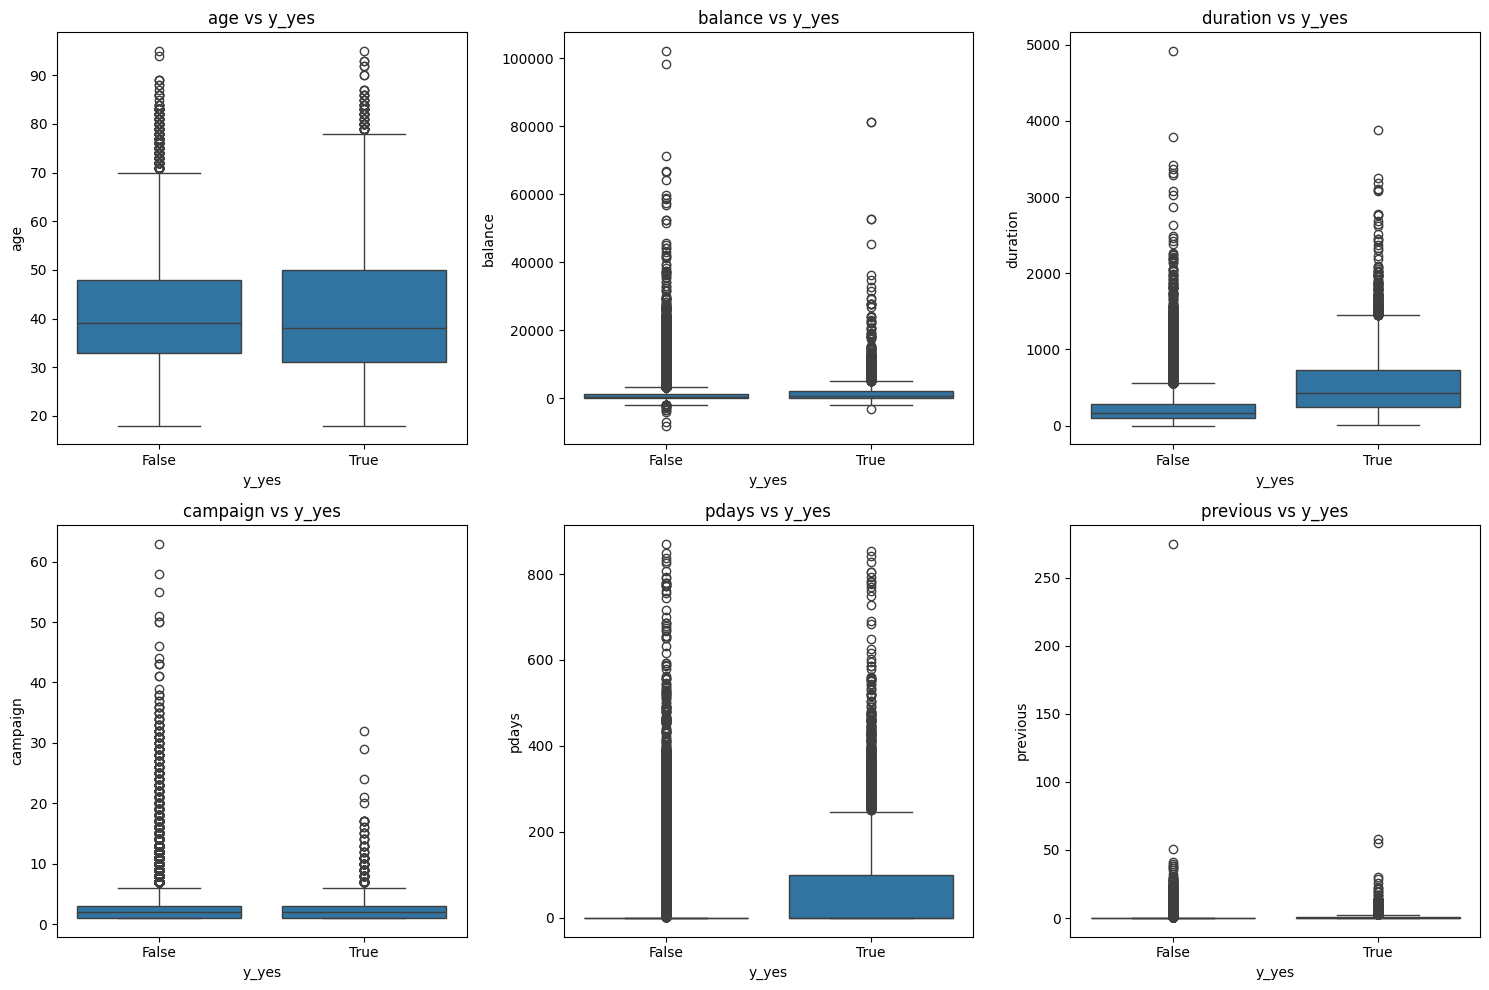

In [10]:
# Create box plots to visualize the relationship between numerical features and the target variable y_yes
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='y_yes', y=feature, data=dfBnk_encoded)
    plt.title(f'{feature} vs y_yes')
plt.tight_layout()
plt.show()

In [25]:
import numpy as np

# Calculate correlation matrix
correlation_matrix = dfBnk_encoded.corr()

# Get absolute correlations with the target variable y_yes
correlation_with_target = correlation_matrix['y_yes'].abs()

# Select the top features that have the highest correlation with the target variable
top_features = correlation_with_target[correlation_with_target > 0.1].index

# Create a new correlation matrix with these top features
top_corr_matrix = dfBnk_encoded[top_features].corr()

# Display the top features
top_features

Index(['duration', 'pdays', 'housing_yes', 'contact_unknown', 'month_mar',
       'month_may', 'month_oct', 'month_sep', 'poutcome_success',
       'poutcome_unknown', 'y_yes'],
      dtype='object')

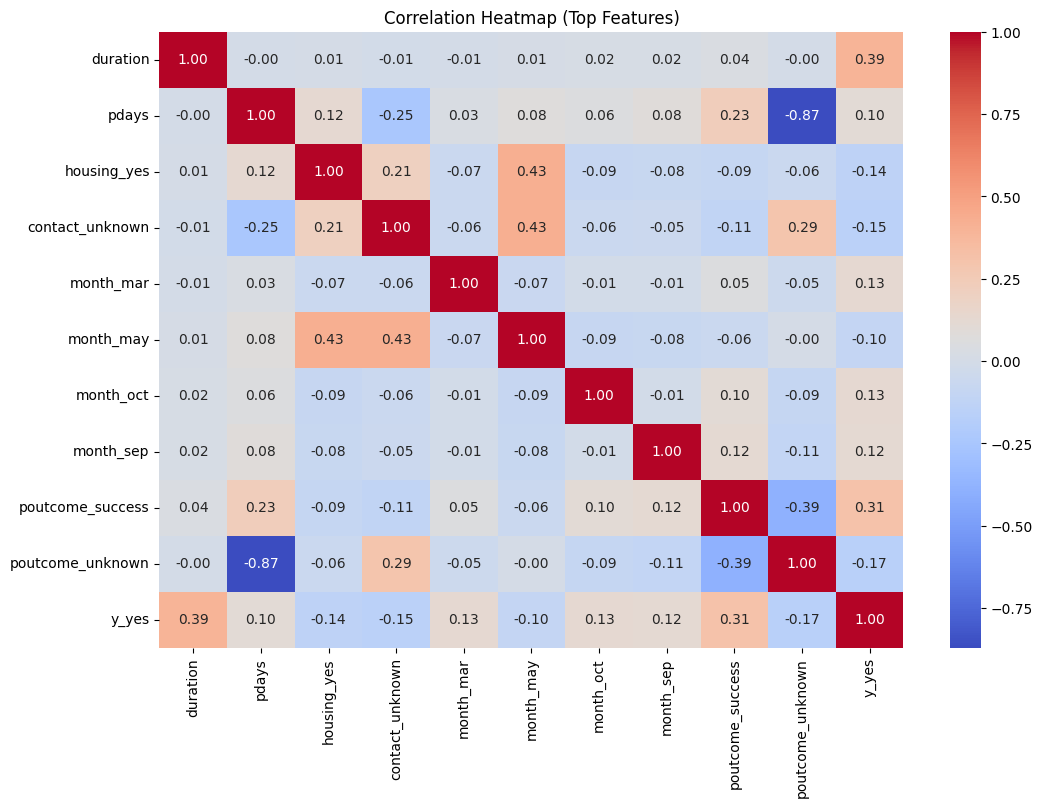

In [26]:
# Plot the heatmap with the top features
plt.figure(figsize=(12, 8))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Top Features)')
plt.show()

#**Model Training and Evaluation**

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Define features and target variable
X = dfBnk_encoded.drop('y_yes', axis=1)
y = dfBnk_encoded['y_yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
#Initialize and train the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Confusion Matrix:
 [[11657   309]
 [ 1048   550]]

Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.97      0.94     11966
        True       0.64      0.34      0.45      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.70     13564
weighted avg       0.88      0.90      0.89     13564



---
helper method

In [29]:
# Function to plot ROC Curve
def plot_roc_curve(y_test, y_pred, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, y_pred):.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()


---

#**Address Class Imbalance and Try Random Forest**

In [37]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Address class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Initialize and train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, y, cv=5)
print("Cross-Validation Scores (Random Forest):", scores)
print("Mean CV Score:", scores.mean())

# Make predictions on the test set
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate the model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print("Confusion Matrix:\n", conf_matrix_rf)
print("\nClassification Report:\n", class_report_rf)

Cross-Validation Scores (Random Forest): [0.8825611  0.69708029 0.72329131 0.64675957 0.26653395]
Mean CV Score: 0.6432452430635484
Confusion Matrix:
 [[11245   721]
 [  689   909]]

Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.94      0.94     11966
        True       0.56      0.57      0.56      1598

    accuracy                           0.90     13564
   macro avg       0.75      0.75      0.75     13564
weighted avg       0.90      0.90      0.90     13564



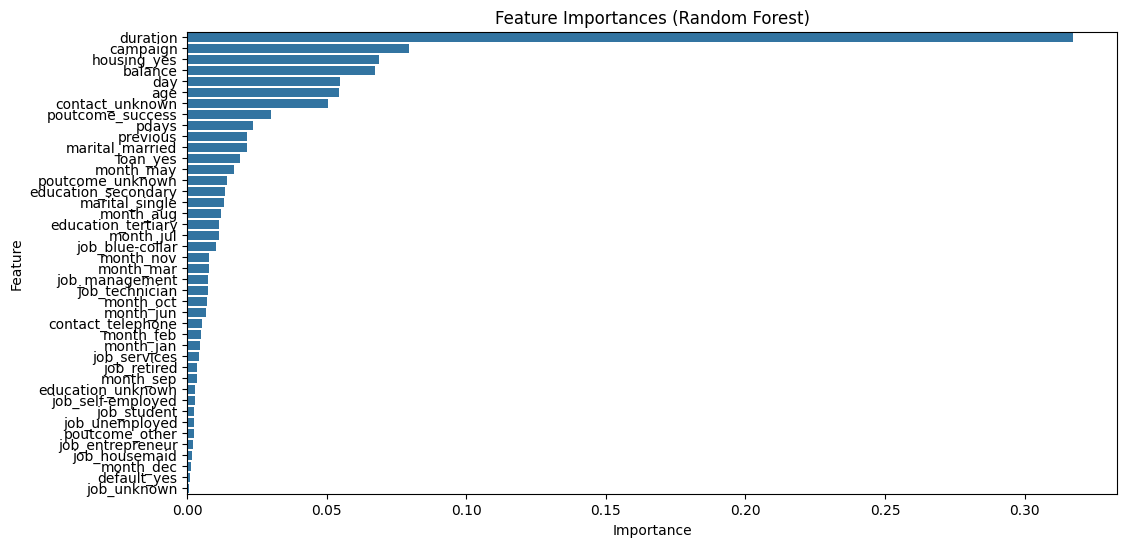

In [27]:
# Feature Importance Plot for Random Forest
feature_importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances (Random Forest)')
plt.show()

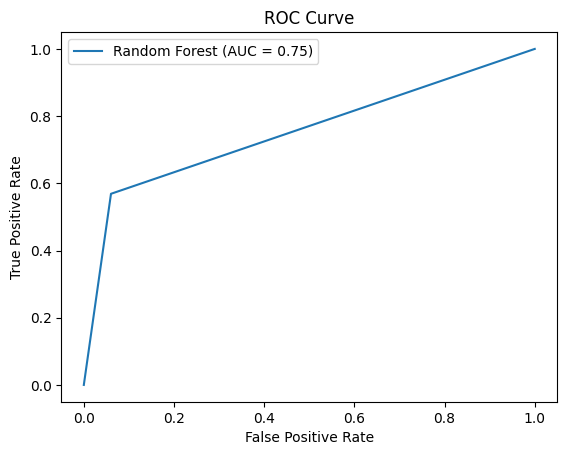

In [33]:
plot_roc_curve(y_test, y_pred_rf, 'Random Forest')

In [16]:
# Display summary results
from sklearn.metrics import roc_auc_score

print ('AUC Score (Logistic Regression):')
print (roc_auc_score(y_test, y_pred_rf))

AUC Score (Logistic Regression):
0.7542909959528635


In [20]:
# Build Naive Bayes - Gaussian model
from sklearn.naive_bayes import GaussianNB

mdlNbgHrt = GaussianNB()
mdlNbgHrt.fit(X_train,y_train)
y_test_pred = mdlNbgHrt.predict(X_test)

print ('Results (Naive Bayes - Gaussian):\n')

print ('Classification Report:')
print (classification_report(y_test, y_test_pred))

print ('AUC Score:')
print (roc_auc_score(y_test, y_test_pred))

Results (Naive Bayes - Gaussian):

Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.91      0.92     11966
        True       0.42      0.50      0.45      1598

    accuracy                           0.86     13564
   macro avg       0.67      0.70      0.69     13564
weighted avg       0.87      0.86      0.86     13564

AUC Score:
0.7014701332540655


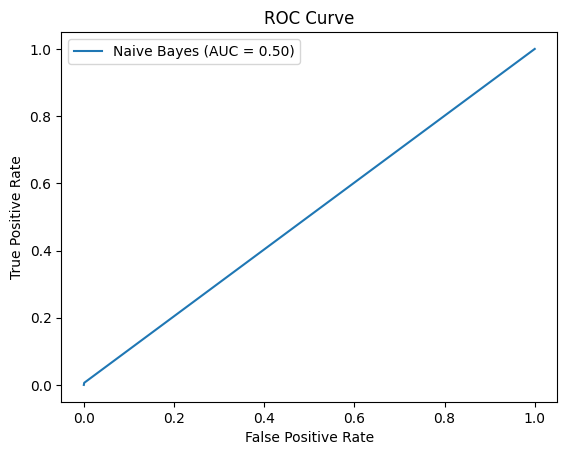

In [34]:
plot_roc_curve(y_test, y_test_pred, 'Naive Bayes')

In [21]:
# Build KNN model with 5 nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

mdlKnnHrt = KNeighborsClassifier(n_neighbors=10)
mdlKnnHrt.fit(X_train, y_train)
y_test_pred = mdlKnnHrt.predict(X_test)

print ('AUC Score (K-Nearest Neighbor):')
print (roc_auc_score(y_test, y_test_pred))

AUC Score (K-Nearest Neighbor):
0.5787257157691474


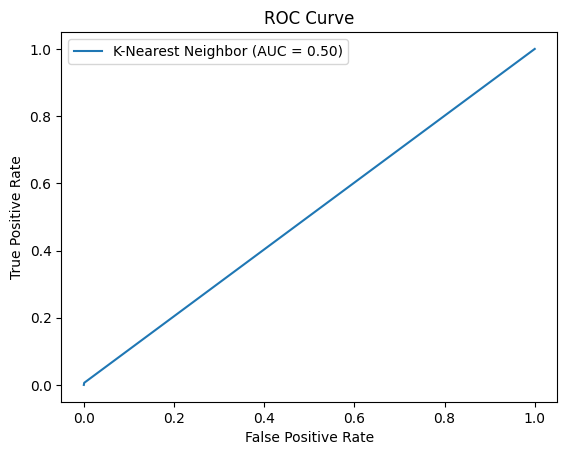

In [35]:
plot_roc_curve(y_test, y_test_pred, 'K-Nearest Neighbor')

In [22]:
# Build Support Vector Machines - Classifier model

from sklearn.svm import SVC

mdlSvmHrt = SVC()
mdlSvmHrt.fit(X_train, y_train)
y_test_pred = mdlSvmHrt.predict(X_test)

print ('Results (Support Vector Classifier):\n')

print ('Classification Report:')
print (classification_report(y_test, y_test_pred))

print ('AUC Score:')
print (roc_auc_score(y_test, y_test_pred))

Results (Support Vector Classifier):

Classification Report:
              precision    recall  f1-score   support

       False       0.88      1.00      0.94     11966
        True       0.50      0.01      0.01      1598

    accuracy                           0.88     13564
   macro avg       0.69      0.50      0.47     13564
weighted avg       0.84      0.88      0.83     13564

AUC Score:
0.5027110605622899


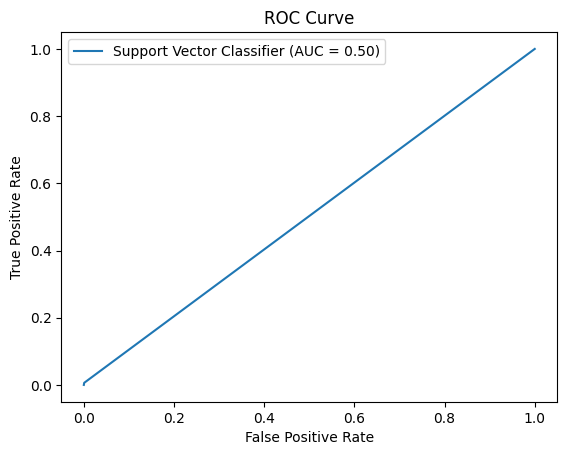

In [36]:
plot_roc_curve(y_test, y_test_pred, 'Support Vector Classifier')